# Lecture 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage.exposure import equalize_hist

In [2]:
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=[12,8]

In [3]:
I = io.imread('watch.jpg')
I = equalize_hist(I)
F = np.fft.fft2(I)

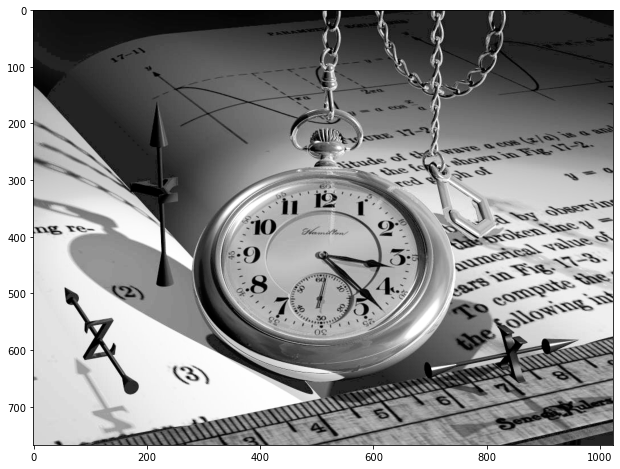

In [4]:
plt.imshow(I)

### Discrete Fourier transform

In [5]:
F = np.fft.fft2(I)

In [6]:
A = np.abs(F)

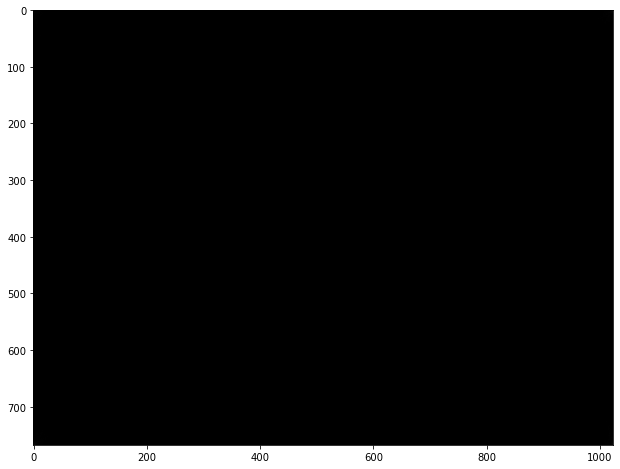

In [7]:
plt.imshow(A)

In [8]:
A = np.fft.fftshift(A)

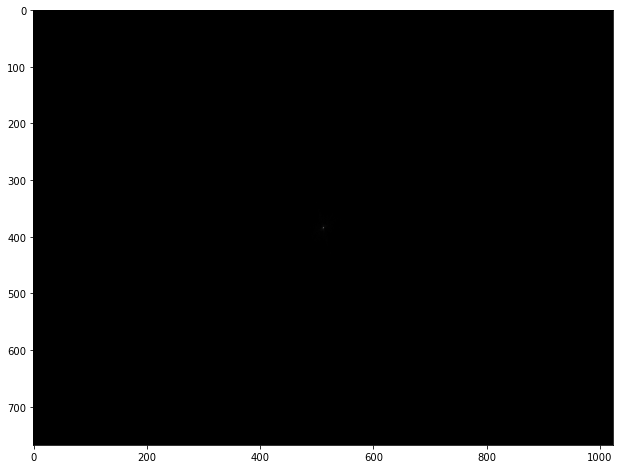

In [9]:
plt.imshow(A)

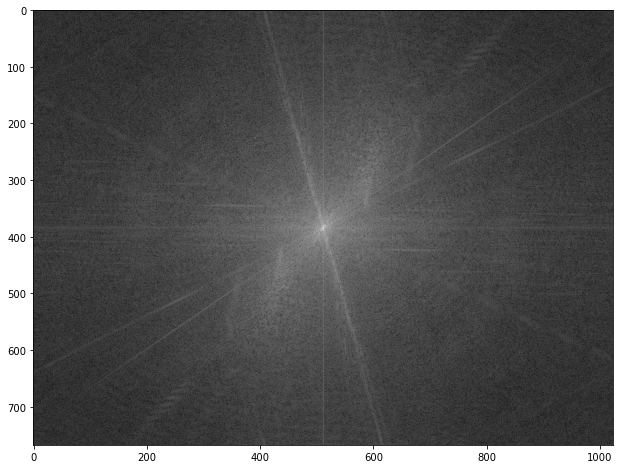

In [10]:
plt.imshow(np.log(A+1.0))

In [11]:
P = np.angle(F)
P = np.fft.fftshift(P)

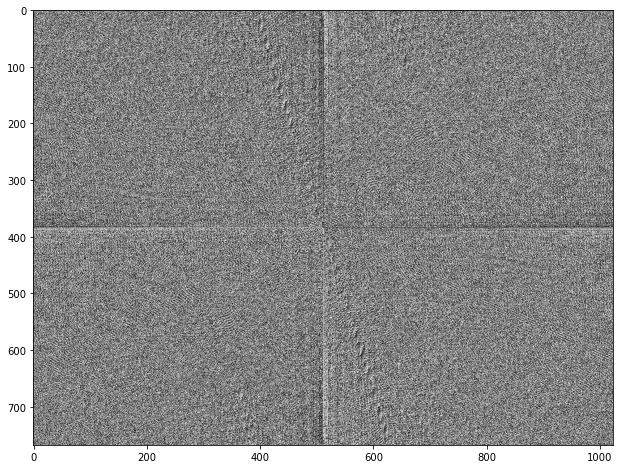

In [12]:
plt.imshow(P)

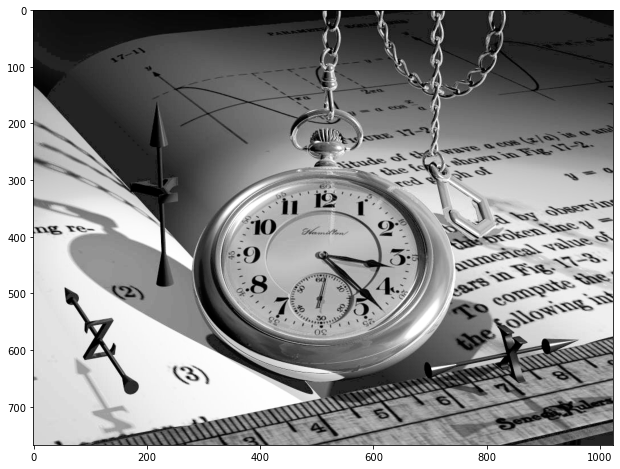

In [13]:
plt.imshow(np.fft.ifft2(F).real)

### Frequency domain filtering

In [14]:
avg = np.ones((7,7))/49

In [15]:
H = np.fft.fft2(avg,I.shape)

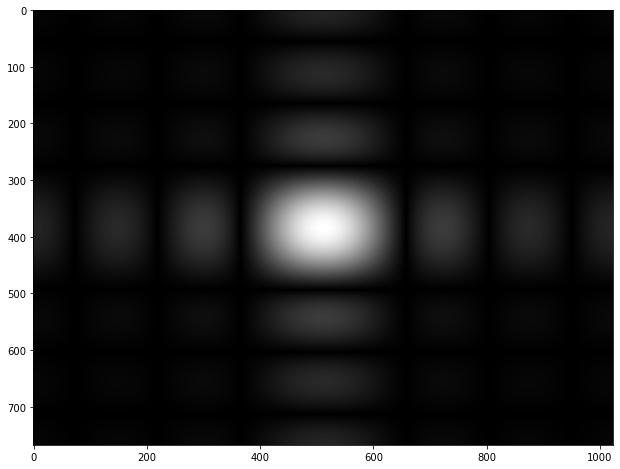

In [16]:
plt.imshow(np.abs(np.fft.fftshift(H)))

In [17]:
G = np.fft.ifft2(F*H).real

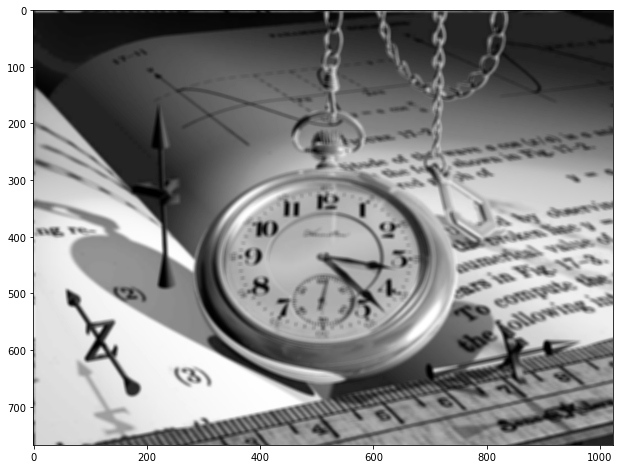

In [18]:
plt.imshow(G)

### Ideal low-pass filter

In [19]:
m,n = I.shape

In [20]:
u0 = np.fft.fftfreq(n)
v0 = np.fft.fftfreq(m)

In [21]:
print(u0)

[ 0.          0.00097656  0.00195312 ... -0.00292969 -0.00195312
 -0.00097656]


In [22]:
u,v = np.meshgrid(u0,v0)

In [23]:
D = np.sqrt(u**2 + v**2)
D0 = 0.1

In [24]:
HI = D <= D0

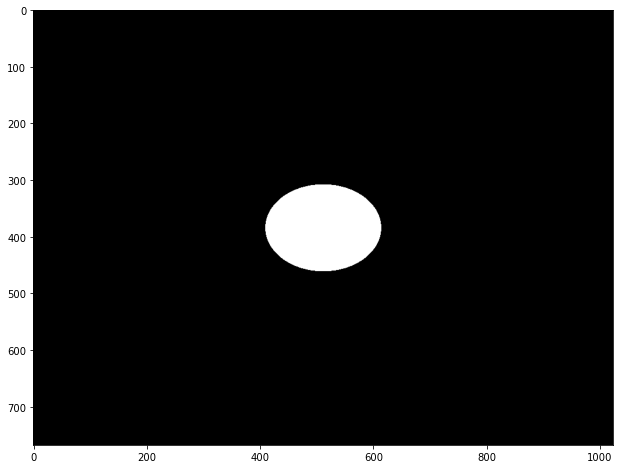

In [25]:
plt.imshow(np.fft.fftshift(HI))

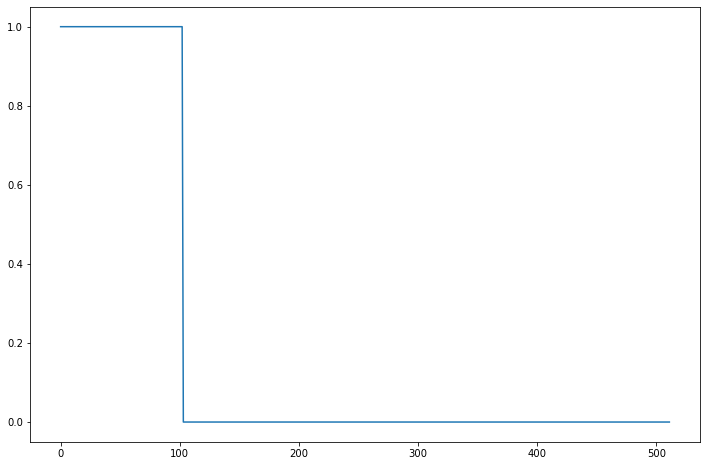

In [26]:
plt.plot(HI[0,:n//2])

In [27]:
G = np.fft.ifft2(F*HI).real.clip(0,255)

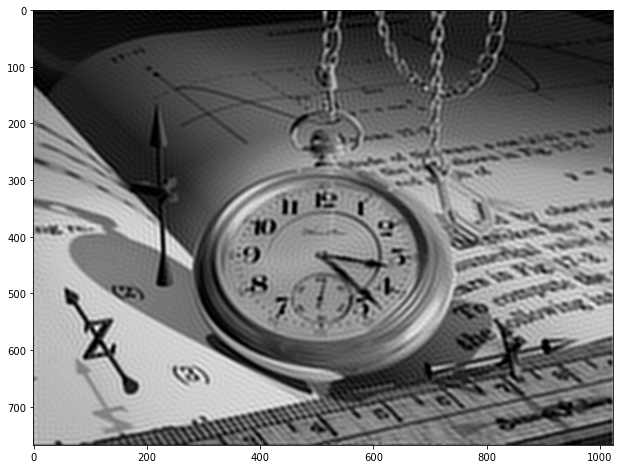

In [28]:
plt.imshow(G)

### Butterworth low-pass filter

In [29]:
HB = 1/(1+(D/D0)**4)

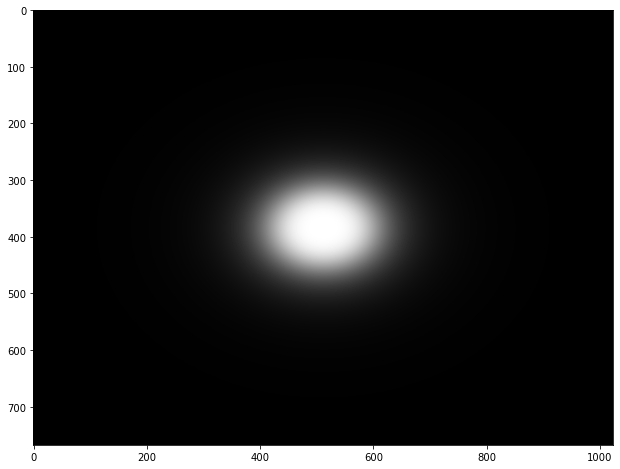

In [30]:
plt.imshow(np.fft.fftshift(HB))

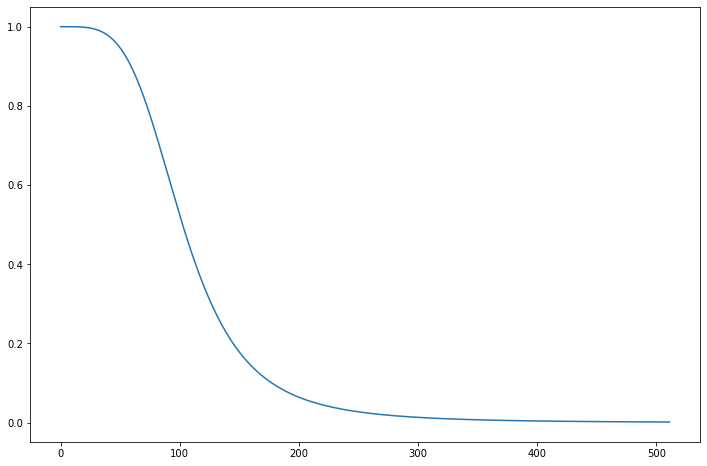

In [31]:
plt.plot(HB[0,:n//2])

In [32]:
G = np.fft.ifft2(HB*F).real

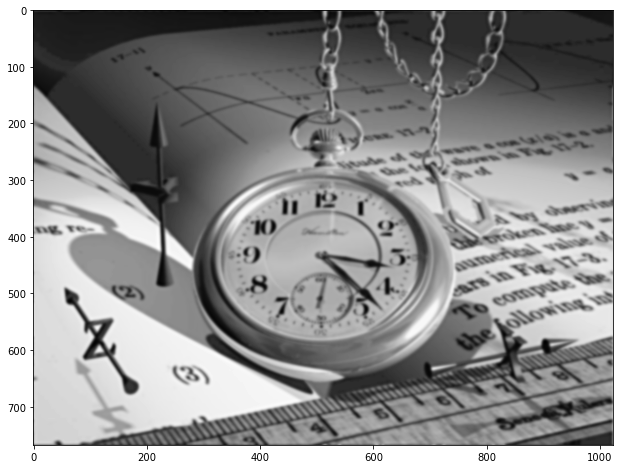

In [33]:
plt.imshow(G)

### Gaussian low-pass filter

In [34]:
HG = np.exp(-D**2/2/D0**2)

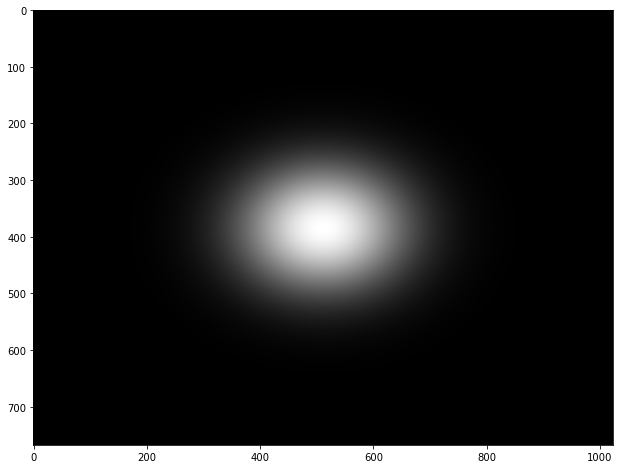

In [35]:
plt.imshow(np.fft.fftshift(HG))

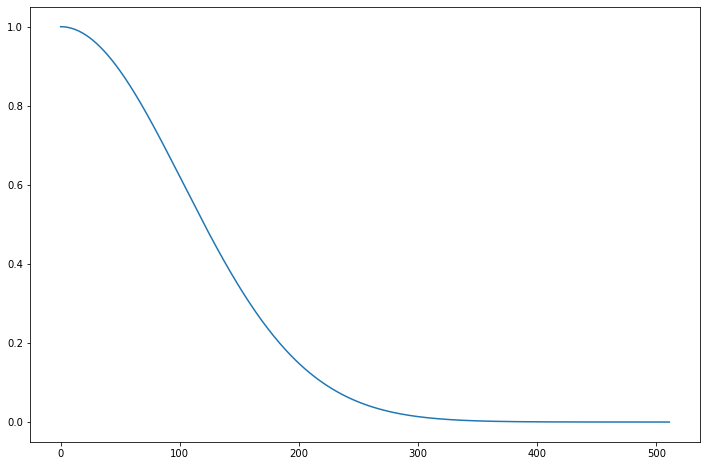

In [36]:
plt.plot(HG[0,:n//2])

In [37]:
G = np.fft.ifft2(HG*F).real

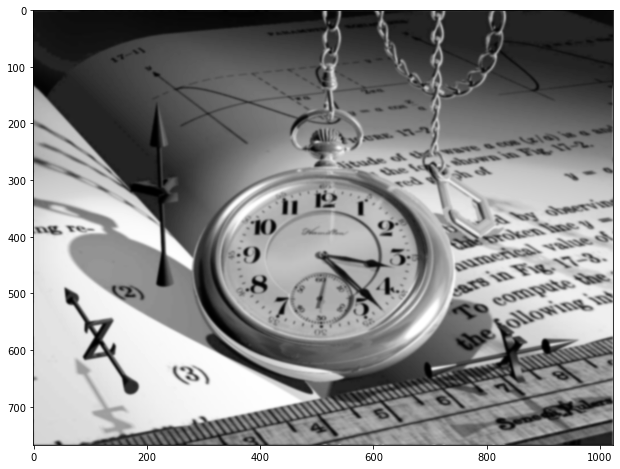

In [38]:
plt.imshow(G)

### Gaussian high-pass filter

In [39]:
HGh = 1 - HG

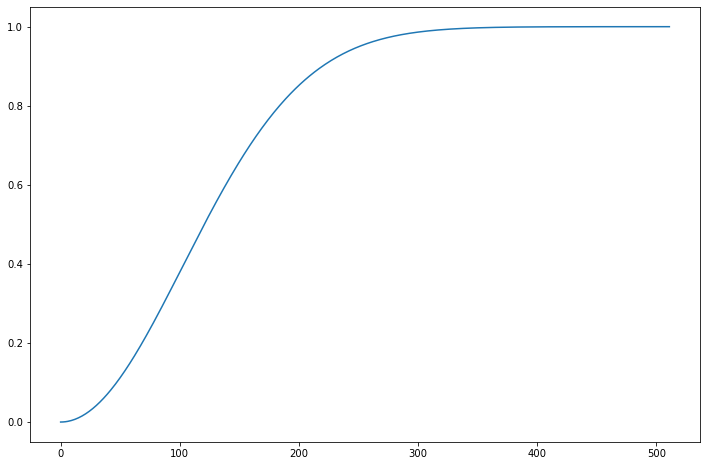

In [40]:
plt.plot(HGh[0,:n//2])

In [41]:
G = np.fft.ifft2(HGh*F).real

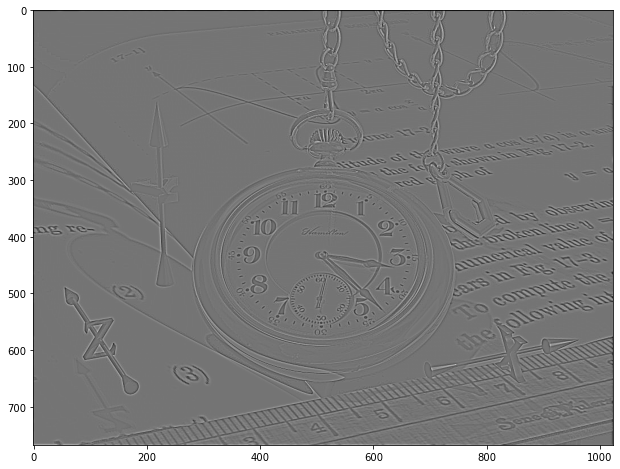

In [42]:
plt.imshow(G)

### Laplacian operator

In [43]:
L = -(u**2+v**2)

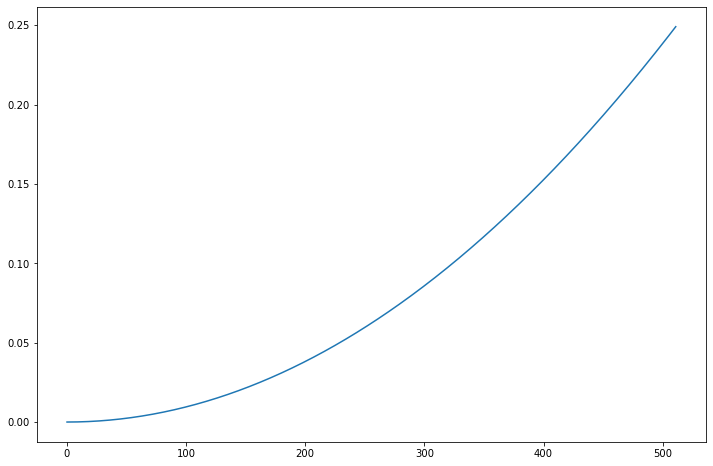

In [44]:
plt.plot(abs(L[0,:n//2]))

In [45]:
LI = np.fft.ifft2(L*F).real

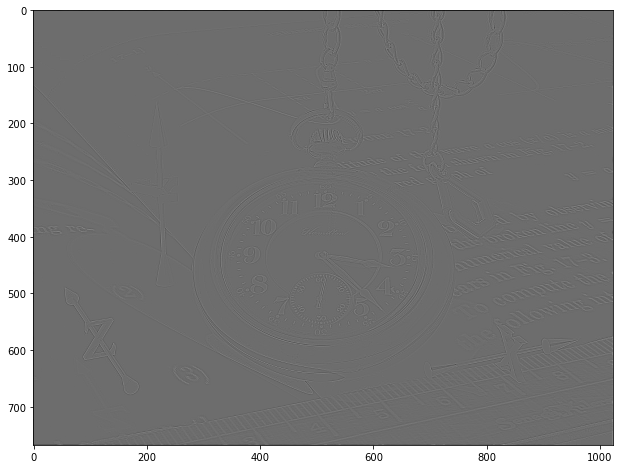

In [46]:
plt.imshow(LI)

### Homomorphic filter

In [47]:
D0 = 0.005
HGh = 1 - np.exp(-D**2/2/D0**2)
HGh = HGh*0.7 + 0.4

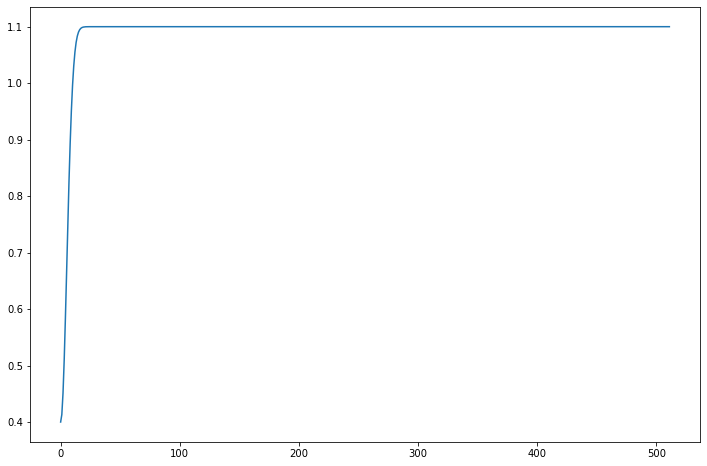

In [48]:
plt.plot(HGh[0,:n//2])

In [49]:
FL = np.fft.fft2(np.log(I))

In [50]:
GL = np.fft.ifft2(FL*HGh).real

In [51]:
IH = (np.exp(GL)).clip(0,1)

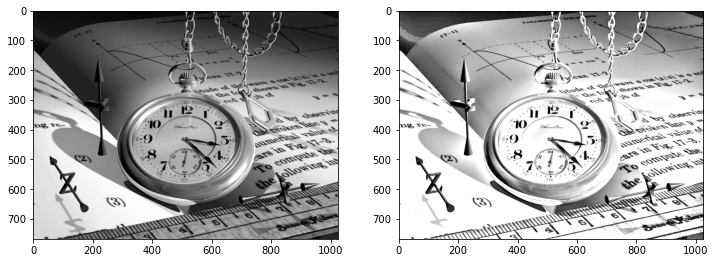

In [52]:
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(IH);